In [1]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD

In [2]:
# Parameters
batch_size = 128
img_height, img_width = 28, 28

In [3]:
# Image data generators for loading and preprocessing images from directories
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [4]:
# Load training and test data
train_generator = train_datagen.flow_from_directory(
    r"D:\DL-Practical Main LP IV\mnist-jpg\mnist-jpg\train",  # Path to train folder
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='sparse'
)

Found 60000 images belonging to 10 classes.


In [5]:
test_generator = test_datagen.flow_from_directory(
    r"D:\DL-Practical Main LP IV\mnist-jpg\mnist-jpg\test",  # Path to test folder
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

Found 10000 images belonging to 10 classes.


In [6]:
# Define the model architecture
model = Sequential([
    Flatten(input_shape=(img_height, img_width, 1)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

D:\Anaconda\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=SGD(learning_rate=0.1, momentum=0.9))

In [8]:
# Train the model
history = model.fit(train_generator, epochs=11, validation_data=test_generator)

Epoch 1/11


D:\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


469/469 ━━━━━━━━━━━━━━━━━━━━ 1587s 3s/step - accuracy: 0.8204 - loss: 0.5564 - val_accuracy: 0.9594 - val_loss: 0.1296
Epoch 2/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 651s 1s/step - accuracy: 0.9570 - loss: 0.1418 - val_accuracy: 0.9619 - val_loss: 0.1279
Epoch 3/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 118s 248ms/step - accuracy: 0.9682 - loss: 0.1049 - val_accuracy: 0.9736 - val_loss: 0.0920
Epoch 4/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 168ms/step - accuracy: 0.9729 - loss: 0.0875 - val_accuracy: 0.9730 - val_loss: 0.0862
Epoch 5/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 165ms/step - accuracy: 0.9790 - loss: 0.0682 - val_accuracy: 0.9725 - val_loss: 0.0911
Epoch 6/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 78s 165ms/step - accuracy: 0.9806 - loss: 0.0621 - val_accuracy: 0.9743 - val_loss: 0.0893
Epoch 7/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 165ms/step - accuracy: 0.9823 - loss: 0.0540 - val_accuracy: 0.9763 - val_loss: 0.0846
Epoch 8/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 167ms/step - accuracy: 0.9841 - loss: 0.0496 - val_a

In [9]:
# Evaluate the model
loss, acc = model.evaluate(test_generator)
print("Test Loss:", loss)
print("Test Accuracy:", acc)

79/79 ━━━━━━━━━━━━━━━━━━━━ 12s 146ms/step - accuracy: 0.9856 - loss: 0.0561
Test Loss: 0.09545379877090454
Test Accuracy: 0.9750000238418579


In [14]:
# Generate predictions for the test set
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_generator.classes  # True labels from the directory
print(predictions)

79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 143ms/step
[[1.00000000e+00 1.40963713e-19 2.96493342e-12 ... 4.25905683e-14
  8.16901669e-17 5.95599145e-14]
 [9.99999285e-01 9.71602695e-14 6.83109125e-09 ... 4.89922200e-11
  1.52559877e-12 7.96517463e-10]
 [1.00000000e+00 1.08964334e-14 3.16166258e-08 ... 2.29892026e-11
  6.71264650e-12 7.57975822e-13]
 ...
 [4.04345224e-09 1.10326727e-10 1.18990828e-09 ... 8.78818298e-07
  2.31145734e-08 9.98360217e-01]
 [4.13490797e-10 9.29110816e-11 1.18763142e-08 ... 3.24935027e-05
  1.07114384e-09 9.99918342e-01]
 [2.79028509e-14 7.25468949e-16 3.42527222e-12 ... 1.45513268e-10
  3.72144298e-14 9.99943852e-01]]


In [13]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print(conf_matrix)

[[ 972    0    1    1    1    0    2    1    2    0]
 [   0 1127    4    1    0    0    1    0    2    0]
 [   1    0 1019    1    2    1    1    3    4    0]
 [   0    1    9  987    0    7    0    1    3    2]
 [   2    0    3    0  966    0    3    1    0    7]
 [   1    1    0    9    0  872    4    0    2    3]
 [   5    1    0    0   10    5  935    0    2    0]
 [   2   10   22    2    2    0    0  982    2    6]
 [   4    0   15    8    5    7    3    2  925    5]
 [   2    5    2    3   16    5    1    5    5  965]]


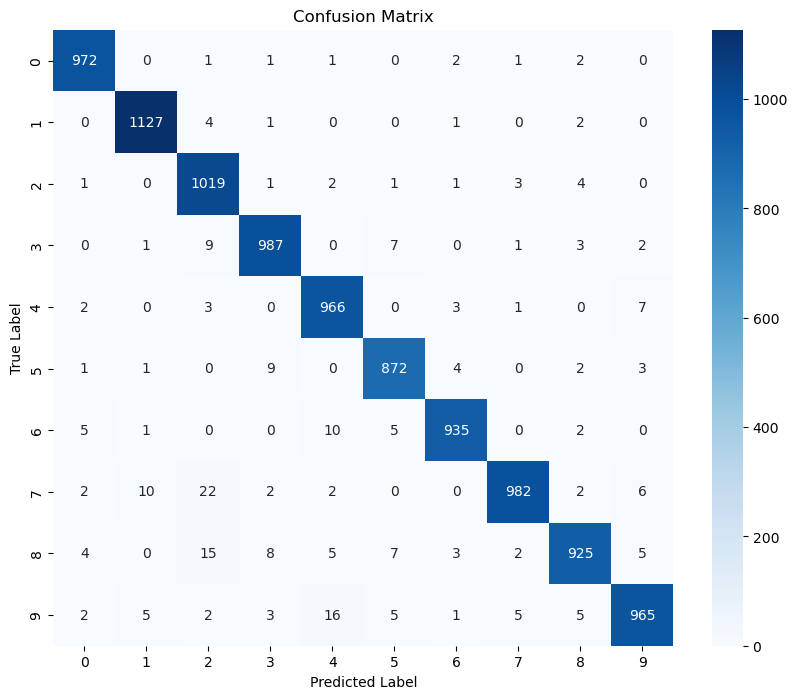

In [12]:
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

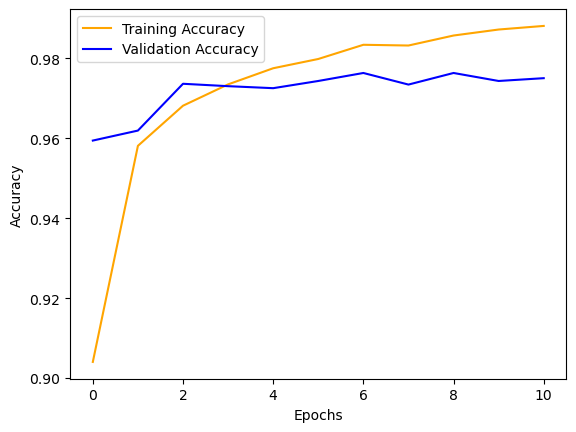

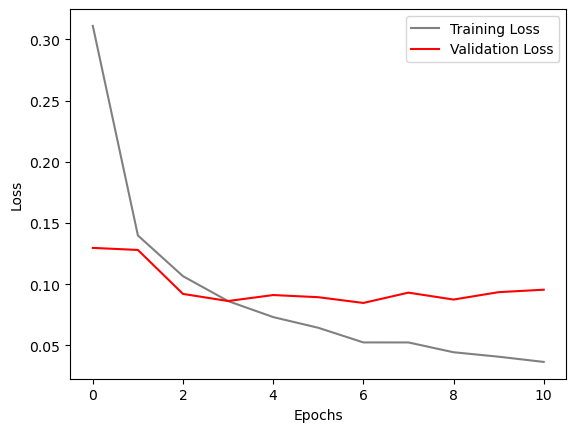

In [15]:
# Plot accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy', color='orange')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='blue')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot loss over epochs
plt.plot(history.history['loss'], label='Training Loss', color='gray')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
